<a href="https://colab.research.google.com/github/RajaMuneeshKanth/hadnwrittendigit.ipynb/blob/main/Handwrittendigit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

1. Normalize images by dividing pixels by 255

In [ ]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [ ]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

2. Convert labels to categories

In [ ]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

3. Build a CNN Architecture

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

4. Execute the model for appropriate number of epochs

In [ ]:
batch_size = 128
epochs = 6

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/6
422/422 [==============================] - 39s 91ms/step - loss: 0.0766 - accuracy: 0.9763 - val_loss: 0.0486 - val_accuracy: 0.9878
Epoch 2/6
422/422 [==============================] - 38s 91ms/step - loss: 0.0634 - accuracy: 0.9801 - val_loss: 0.0414 - val_accuracy: 0.9878
Epoch 3/6
422/422 [==============================] - 38s 91ms/step - loss: 0.0569 - accuracy: 0.9826 - val_loss: 0.0379 - val_accuracy: 0.9895
Epoch 4/6
422/422 [==============================] - 39s 91ms/step - loss: 0.0504 - accuracy: 0.9843 - val_loss: 0.0337 - val_accuracy: 0.9917
Epoch 5/6
422/422 [==============================] - 38s 91ms/step - loss: 0.0465 - accuracy: 0.9856 - val_loss: 0.0382 - val_accuracy: 0.9890
Epoch 6/6
422/422 [==============================] - 38s 91ms/step - loss: 0.0429 - accuracy: 0.9862 - val_loss: 0.0307 - val_accuracy: 0.9917


5. Depict loss vs val_loss on line chart

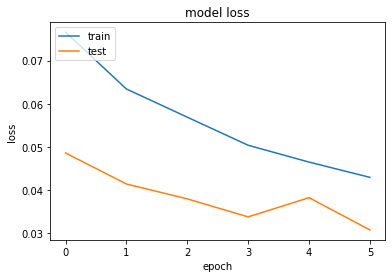

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

6. Depict accuracy vs val_accuracy on line chart

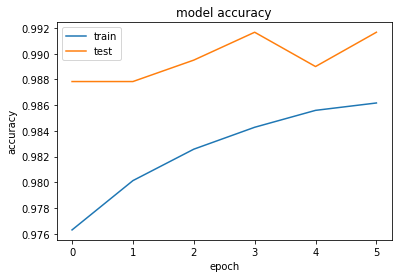

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

7. Generate predictions on test_data

In [ ]:
predictions = model.predict(x_test)
y_pred = predictions.argmax(axis=-1)

8. Compute Confusion Matrix and Classification Report

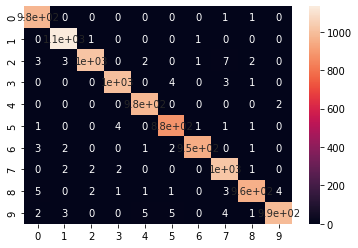

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

